# ***Run on google colab to avoid troubleshooting installing keras and tensorflow. Also remember to import the dataset.  ***


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import pandas as pd

In [24]:
# loading csv data into pandas dataframes

# training data and testing data
training_path = "/content/trainingSymptomDataset.csv"

# validation data
testing_path = "/content/testingSymptomsDataset.csv"

df_training = pd.read_csv(training_path)
df_testing = pd.read_csv(testing_path)

df_testing[df_testing.isnull().any(axis=1)]

,bleeding,chest,pain,dizziness,cold,pale,vomiting,nausea,abdominal,fever,shortnesss,breath,sweating,unconscious,fatigue,obese,cough,wheezing,numbness,confusion,headache,bruising,swelling,arm,leg,tenderness,sneezing,rash,itchy,blisters,skin,diarrhea,tightness,cramps,rapid,heart,seizures,slow,throat,diagnosis


In [25]:
# define the features
features = df_training.columns[:-1]
features
feat = df_training.columns[0:]
feat

Index(['bleeding', 'chest', 'pain', 'dizziness', 'cold', 'pale', 'vomiting',
       'nausea', 'abdominal', 'fever', 'shortnesss', 'breath', 'sweating',
       'unconscious', 'fatigue', 'obese', 'cough', 'wheezing', 'numbness',
       'confusion', 'headache', 'bruising', 'swelling', 'arm', 'leg',
       'tenderness', 'sneezing', 'rash', 'itchy', 'blisters', 'skin',
       'diarrhea', 'tightness', 'cramps', 'rapid', 'heart', 'seizures', 'slow',
       'throat', 'diagnosis'],
      dtype='object')

In [26]:
# define the labels
labels =df_training.columns[-1]
labels


'diagnosis'

In [27]:
# one hot encode labels of training and testing dataframe
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
diagnosis_labels = encoder.fit_transform(df_training['diagnosis'])
testing_labels = encoder.fit_transform(df_testing['diagnosis'])

# training dataframe
x = df_training[features]
y = np.asarray(diagnosis_labels)

# used for validation
testing_x = df_testing[features]
testing_y = np.asarray(testing_labels)



In [28]:
# train-test split 30% test 70% train. ratio based on try and error.
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)

train_x.shape

(1624, 39)

In [29]:
# define the sequential model.
# 1 input layer of 128 'neurons', 2 hidden layers of 64 and 32 'neurons' respectively, 1 output layer of 23 'neurons' representing 23 classes(all the labels). 
# hidden layers used relu as activation function. output layer uses softmax as activation function since the out put is multi-classed.
from keras.optimizers import SGD
model = keras.Sequential()

model.add(layers.Flatten(input_shape=(39,)))
model.add(layers.BatchNormalization())

model.add(layers.Dense((128), activation=tf.nn.relu))
model.add(layers.Dropout(0.1))

model.add(layers.Dense((64), activation=tf.nn.relu))
model.add(layers.Dropout(0.1))

model.add(layers.Dense((32), activation=tf.nn.relu))
model.add(layers.Dropout(0.1))


model.add(layers.Dense((23), activation='softmax'))
model.add(layers.Dropout(0.1))

# define optimizer as adam and early stopping function to stop training loss.
# loss function is sparse categorical crossentropy because predicting multi-class

#opt = SGD(lr=0.0000001)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= 'adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(
     patience=15,
     min_delta=0.001,
     restore_best_weights=True,
 )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 39)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 39)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5120      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [30]:
# train the model.
history = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    batch_size=10,
    epochs=100,
    callbacks = early_stopping
    
)

Epoch 1/100
163/163 [==============================] - 2s 6ms/step - loss: 3.6610 - accuracy: 0.2717 - val_loss: 0.6035 - val_accuracy: 0.9239
Epoch 2/100
163/163 [==============================] - 1s 5ms/step - loss: 1.7312 - accuracy: 0.7891 - val_loss: 0.1429 - val_accuracy: 0.9425
Epoch 3/100
163/163 [==============================] - 1s 5ms/step - loss: 1.3953 - accuracy: 0.7945 - val_loss: 0.1296 - val_accuracy: 0.9353
Epoch 4/100
163/163 [==============================] - 1s 5ms/step - loss: 1.1491 - accuracy: 0.8103 - val_loss: 0.1276 - val_accuracy: 0.9440
Epoch 5/100
163/163 [==============================] - 1s 5ms/step - loss: 0.9745 - accuracy: 0.8217 - val_loss: 0.1145 - val_accuracy: 0.9454
Epoch 6/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7656 - accuracy: 0.8404 - val_loss: 0.1291 - val_accuracy: 0.9483
Epoch 7/100
163/163 [==============================] - 1s 5ms/step - loss: 0.7375 - accuracy: 0.8479 - val_loss: 0.1368 - val_accuracy: 0.9454

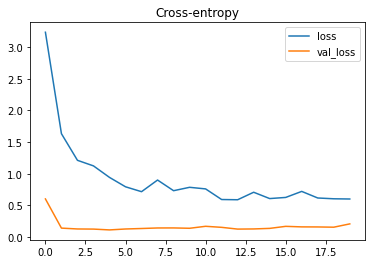

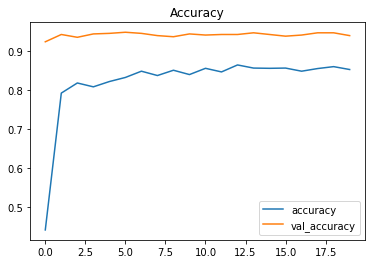

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

### validation accuracy is more than accuracy. Meaning the model perform better on a dataset it has not seem or train on before.

### loss decreases nicely in a log manner. validation loss is even lower.

In [32]:
# checkout the dataframe
testing_x

,bleeding,chest,pain,dizziness,cold,pale,vomiting,nausea,abdominal,fever,shortnesss,breath,sweating,unconscious,fatigue,obese,cough,wheezing,numbness,confusion,headache,bruising,swelling,arm,leg,tenderness,sneezing,rash,itchy,blisters,skin,diarrhea,tightness,cramps,rapid,heart,seizures,slow,throat
0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [44]:
# check the hot encoded value of a label.
test_y[0]

15

In [34]:
# Testing out the model.
test = np.asarray(test_x.iloc[0])

ans = model.predict(test.reshape(1,39))
ans
np.argmax(ans)

# it predicted correctly.

15

In [35]:
# save the model
model.save('my_model.h5')

saved_model_dir = '/content/my_model.h5'


In [36]:
# convert model into tflite model to use on android.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmp680cqtry/assets


INFO:tensorflow:Assets written to: /tmp/tmp680cqtry/assets


68836

In [37]:
# install lib to load tflite
! pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path= '/content/converted_model.tflite')


Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [38]:
test_y[100]

6

In [39]:
df_testing['diagnosis']

0          heart attack
1                stroke
2           broken bone
3       deep laceration
4            concussion
5       servere allergy
6         servere burns
7        food poisoning
8     internal bleeding
9                asthma
10          heat stroke
11             epilepsy
12             asphyxia
13        drug reaction
14            Pneumonia
15         Hypoglycemia
16         Tuberculosis
17                covid
18                  flu
19         dengue fever
20       cardiac arrest
21               anemia
22         pneumothorax
Name: diagnosis, dtype: object

In [40]:
# see all the hot encoded labels
testing_y

array([16, 22,  6, 10,  8, 20, 21, 15, 18,  5, 17, 13,  4, 12,  1,  0,  2,
        9, 14, 11,  7,  3, 19])

In [43]:
# test the accuracy on a totally new dataset. Disclaimer: the new dataset has only 23 of each diagnosis data, model did fairly well for this amount of data.
loss, acc = model.evaluate(testing_x, testing_y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

1/1 - 0s - loss: 1.1039 - accuracy: 0.8696
Restored model, accuracy: 86.96%
